In [ ]:
def get_font_family():
    import platform
    system_name = platform.system()
    
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [ ]:
get_font_family()

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


'NanumBarunGothic'

In [ ]:
# https://financedata.github.io/posts/finance-data-reader-users-guide.html 
!pip install -U finance-datareader

     |████████████████████████████████| 48 kB 2.4 MB/s 


In [ ]:
import pandas as pd
import FinanceDataReader as fdr
fdr.__version__

'0.9.33'

In [ ]:
stocks_dict = {
    '삼성전자': '005930',
    '현대차': '005380',
    '엔씨소프트': '036570',
    '셀트리온': '068270',
    '한국항공우주': '047810',
    'LG에너지솔루션': '373220',
    '카카오': '035720',
    'S-Oil': '010950',
    '고려아연': '010130',       # 원자재의 가격변동을 한국에서 가장 자 반영
    '롯데쇼핑': '023530',
    'CJ제일제당':'097950',
    'HMM': '011200',
    '두산에너빌리티': '034020',
    '삼성생명': '032830'
}

In [ ]:
type(stocks_dict)

dict

In [ ]:
stocks_dict.keys()

dict_keys(['삼성전자', '현대차', '엔씨소프트', '셀트리온', '한국항공우주', 'LG에너지솔루션', '카카오', 'S-Oil', '고려아연', '롯데쇼핑', 'CJ제일제당', 'HMM', '두산에너빌리티', '삼성생명'])

In [ ]:
stocks_dict.values()

dict_values(['005930', '005380', '036570', '068270', '047810', '373220', '035720', '010950', '010130', '023530', '097950', '011200', '034020', '032830'])

In [ ]:
stocks_list = []
for stock_code in stocks_dict.values():
    cp = fdr.DataReader(stock_code, '2020')['Close']
    stocks_list.append(cp)

In [ ]:
cp

Date
2020-01-02    73100
2020-01-03    73300
2020-01-06    72700
2020-01-07    72800
2020-01-08    71600
              ...  
2022-05-02    64800
2022-05-03    64300
2022-05-04    64700
2022-05-06    65100
2022-05-09    64800
Name: Close, Length: 581, dtype: int64

In [ ]:
len(stocks_list)

14

In [ ]:
df = pd.concat(stocks_list, axis = 1)
df.columns = stocks_dict.keys()
df

,삼성전자,현대차,엔씨소프트,셀트리온,한국항공우주,LG에너지솔루션,카카오,S-Oil,고려아연,롯데쇼핑,CJ제일제당,HMM,두산에너빌리티,삼성생명
Date,,,,,,,,,,,,,,
2020-01-02,55200,118000,541000,173489,33800,NaN,30609,91900,424000,135500,245000,3750,5081,73100
2020-01-03,55500,116000,565000,171079,33950,NaN,30609,93500,425500,132500,241000,3775,5071,73300
2020-01-06,55500,116000,579000,166742,33900,NaN,31010,93400,421500,128500,233500,3835,4921,72700
2020-01-07,55800,115500,594000,171561,33700,NaN,32114,91900,428000,132000,234000,3900,4903,72800
2020-01-08,56800,112000,604000,166742,32450,NaN,32014,88100,435000,128000,229500,3765,4708,71600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,67300,187000,425000,173000,46450,408500.0,87300,106000,577000,94500,401500,28950,20450,64800
2022-05-03,67500,183500,432500,172000,47200,407500.0,88500,106000,568000,94300,388000,28900,20800,64300
2022-05-04,67900,184000,423000,169000,48150,401500.0,89000,107500,564000,93500,387000,29200,21000,64700


In [ ]:
# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.rc.html
import matplotlib.pyplot as plt
font_family = get_font_family()
plt.rc('font', family=font_family)
plt.rc('axes', unicode_minus=False)
plt.style.use('ggplot')

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


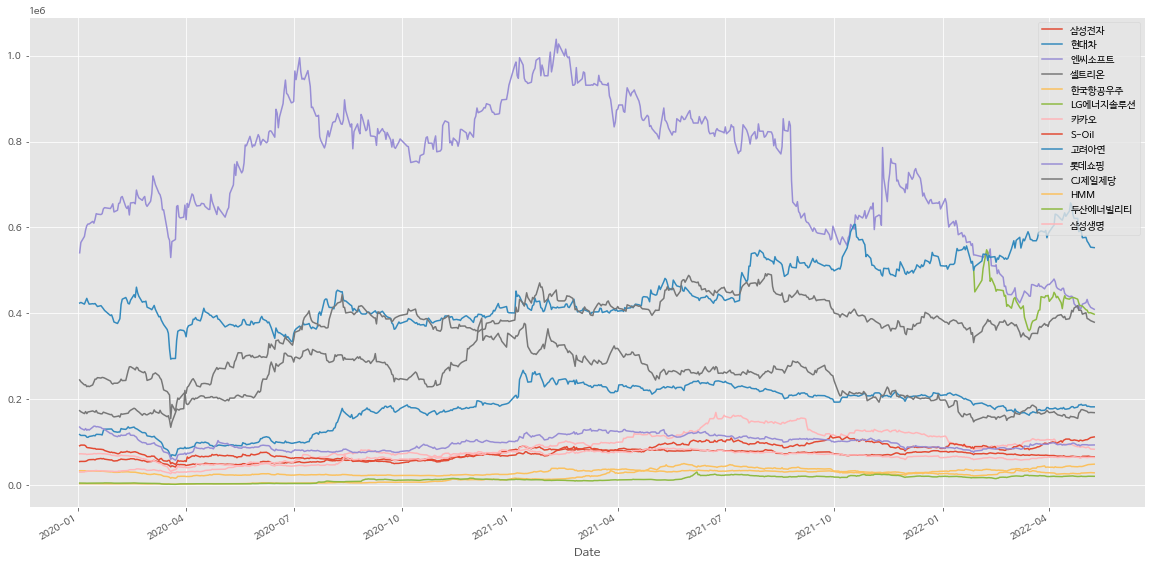

In [ ]:
g = df.plot(figsize=(20, 10))

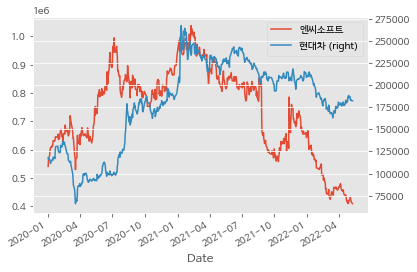

In [ ]:
g = df[['엔씨소프트', '현대차']].plot(secondary_y='현대차')

In [ ]:
import numpy as np
df2 = df[['엔씨소프트', '현대차']]
log_ret = np.log(df2).diff(1).dropna()  # 대부분의 비정상 시계열은 1차 차분후 정상시계열이 됨
log_ret.tail(10)

,엔씨소프트,현대차
Date,,
2022-04-25,-0.023953,0.011050
2022-04-26,0.018019,0.027102
2022-04-27,-0.024098,0.000000
2022-04-28,0.006079,0.007989
2022-04-29,0.021584,-0.013351
2022-05-02,0.008269,0.005362
2022-05-03,0.017493,-0.018894
2022-05-04,-0.022210,0.002721
2022-05-06,-0.021506,-0.008186


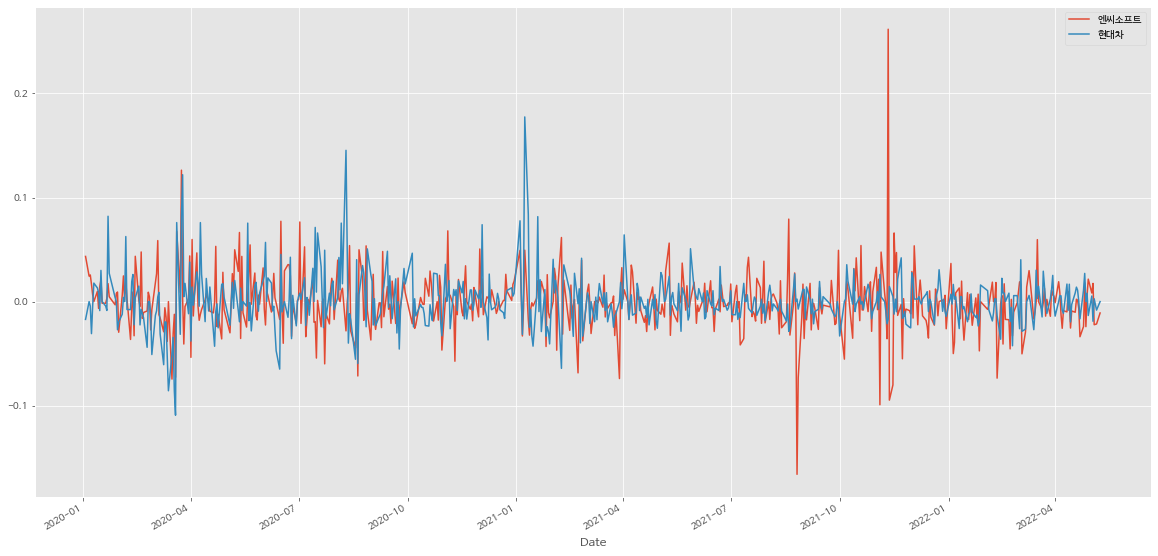

In [ ]:
g = log_ret.plot(figsize=(20, 10))

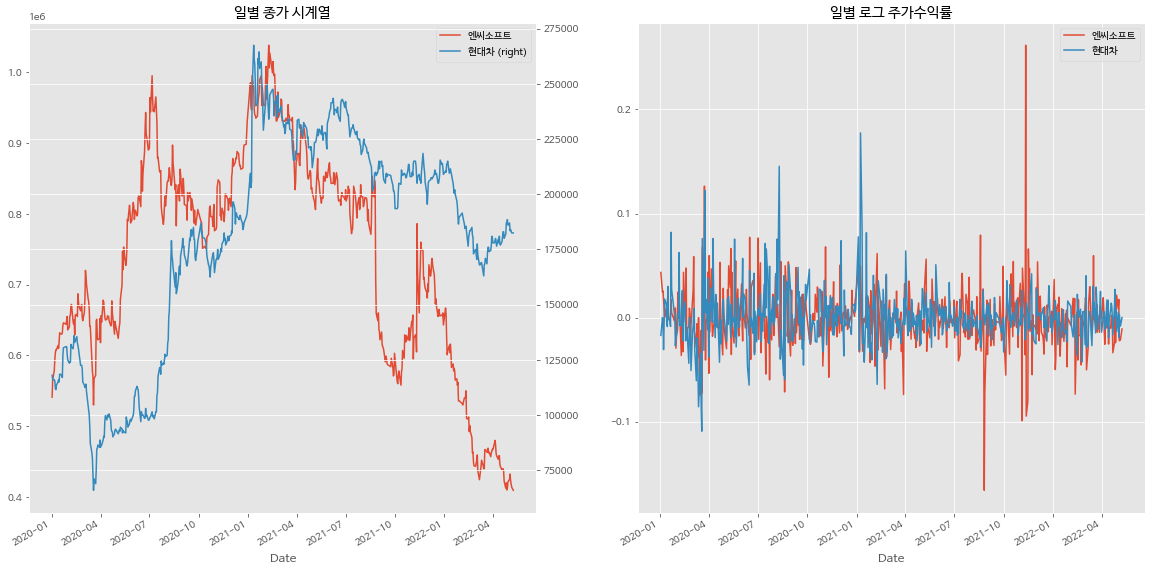

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
g = df[['엔씨소프트', '현대차']].plot(secondary_y='현대차', ax=axes[0], title='일별 종가 시계열')
g = log_ret.plot(ax=axes[1], title = "일별 로그 주가수익률")

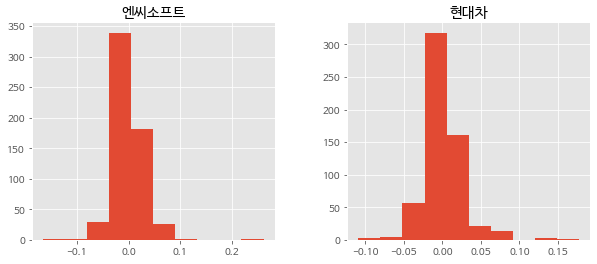

In [ ]:
h = log_ret.hist(figsize=(10, 4))

In [ ]:
df2.describe()

,엔씨소프트,현대차
count,5.810000e+02,581.000000
mean,7.404346e+05,179718.416523
std,1.513245e+05,49033.880492
min,4.095000e+05,65900.000000
25%,6.300000e+05,133500.000000
50%,7.890000e+05,186500.000000
75%,8.500000e+05,218000.000000
max,1.038000e+06,267500.000000


In [ ]:
log_ret_all = np.log(df).diff(1).dropna()
log_ret_all.tail()

,삼성전자,현대차,엔씨소프트,셀트리온,한국항공우주,LG에너지솔루션,카카오,S-Oil,고려아연,롯데쇼핑,CJ제일제당,HMM,두산에너빌리티,삼성생명
Date,,,,,,,,,,,,,,
2022-05-02,-0.001485,0.005362,0.008269,-0.017192,0.057602,-0.020594,-0.029347,0.023867,0.001735,0.000000,0.008756,0.019181,-0.007308,-0.004619
2022-05-03,0.002967,-0.018894,0.017493,-0.005797,0.016017,-0.002451,0.013652,0.000000,-0.015721,-0.002119,-0.034202,-0.001729,0.016970,-0.007746
2022-05-04,0.005908,0.002721,-0.022210,-0.017596,0.019927,-0.014833,0.005634,0.014052,-0.007067,-0.008520,-0.002581,0.010327,0.009569,0.006202
2022-05-06,-0.020834,-0.008186,-0.021506,0.002954,0.007243,0.000000,-0.054255,0.032039,-0.017890,0.001069,-0.010390,0.008525,-0.007168,0.006163
2022-05-09,-0.004521,0.000000,-0.010929,-0.002954,0.012295,-0.008756,-0.005949,0.013423,-0.001807,0.002134,-0.009180,-0.017124,0.000000,-0.004619


In [ ]:
log_ret_all.skew()

삼성전자        0.816507
현대차        -0.149124
엔씨소프트      -0.421144
셀트리온        0.163632
한국항공우주      0.137028
LG에너지솔루션   -0.322991
카카오         0.511260
S-Oil       0.166951
고려아연       -0.108379
롯데쇼핑        0.803243
CJ제일제당     -0.165656
HMM         0.869560
두산에너빌리티     0.446795
삼성생명       -0.177831
dtype: float64

In [ ]:
log_ret_all.kurt()  # HMM이 첨도가 3으로 정규분포와 거의 유사함

# 두산에너빌리티의 경우에는 정규분포보다 첨도가 크므로 이상값이 나올 확률이 더 높음

삼성전자        1.117385
현대차         0.216184
엔씨소프트       1.941357
셀트리온        2.049542
한국항공우주      1.301008
LG에너지솔루션    1.768226
카카오         1.942747
S-Oil      -0.007629
고려아연        0.020408
롯데쇼핑        2.128286
CJ제일제당     -0.088431
HMM         3.048180
두산에너빌리티     3.279990
삼성생명        0.099883
dtype: float64